# The Framingham Heart Study

## Data

The data was downloaded from the GitHub Repository of Prof. Soltaniehha - https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/data/AnalyticsEdge-Datasets/Framingham.csv

The desciption of the columns is as follows:-

* **Male** - The gender of the observations
* **Age** - Age at the time of medical examination in years
* **Education** - A categorical variable in the participants education, with the levels : Some High School (1), High School/GED (2), collage/vocational school(3), college (4)
* **Current Smoker** - Current ciggarette smoking at the time of examinations
* **Cigs Per Day** - Number of ciggarette smoked each day
* **BP Meds** - Use of Anti-hypertensive medication at exam
* **Prevalent Stroke** - 0 represents NO Stroke and 1 represents Past History of Stroke
* **Prevalent Hyp** - Prevalent Hypertensive, 0 represents the person is NOT Hypertensive and 1 represents the person is Hypertensive
* **Diabetes** - 0 represnts the person DOES NOT have diabetes and 1 represents that the person has diabetes
* **Tot Chol** - Total Cholestrol (mg/dL)
* **sys BP** - Systolic Blood Pressure (mmHg)
* **dia BP** - Diastolic Blood Pressure (mmHg)
* **BMI** - Body Mass Index of Person, weight(kg) / height (m) ^ 2
* **Heart Rate** - Heart Rate in beats/min
* **Glucose** - Glucose level (mg/dL)
* **Ten Year CHD** - Ten Year Coronary Heart Disease. The 10 year risk of coronary heart disease

## Basic Information

* There are 4240 rows
* There are 16 columns


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh
from bokeh.plotting import figure , show
from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.resources import INLINE
from bokeh.models import RangeSlider
from bokeh.layouts import layout
from bokeh.models import ColumnDataSource
from bokeh.models import Select, CustomJS
from bokeh.layouts import column
output_notebook(INLINE)

In [ ]:
# Read CSV File
df = pd.read_csv('Framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Impute Missing Values

The dataset contains missing values in 7 columns, indicated by the label "NA." Given the dataset's mix of categorical and numerical variables, we can effectively handle these missing values by replacing missing categorical variables with the mode and missing numerical variables with the mean.

In [ ]:
# Checking the count of null values in each column
null_value_count = df.isnull().sum()
print(null_value_count)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Categorical Variables - Replacing the null values to a pd.NA first and then replacing them with the MODE
df['education'] = df['education'].replace('NA', pd.NA)
mode_education = df['education'].mode().values[0]
df['education'].fillna(mode_education, inplace = True)

df['BPMeds'] = df['BPMeds'].replace('NA', pd.NA)
mode_BPMeds = df['BPMeds'].mode().values[0]
df['BPMeds'].fillna(mode_BPMeds, inplace = True)

In [ ]:
# Numerical Variables - Replacing the null values to a pd.NA first and then replacing them with the MEAN
df['cigsPerDay'] = df['cigsPerDay'].replace('NA', pd.NA)
mean_cigs_per_day = df['cigsPerDay'].mean()
df['cigsPerDay'].fillna(mean_cigs_per_day, inplace = True)

df['totChol'] = df['totChol'].replace('NA', pd.NA)
mean_total_chol = df['totChol'].mean()
df['totChol'].fillna(mean_total_chol, inplace = True)

df['BMI'] = df['BMI'].replace('NA', pd.NA)
mean_BMI = df['BMI'].mean()
df['BMI'].fillna(mean_BMI, inplace = True)

df['glucose'] = df['glucose'].replace('NA', pd.NA)
mean_glucose = df['glucose'].mean()
df['glucose'].fillna(mean_glucose, inplace = True)

df['heartRate'] = df['heartRate'].replace('NA', pd.NA)
mean_heart_rate = df['heartRate'].mean()
df['heartRate'].fillna(mean_heart_rate, inplace = True)

In [ ]:
#Checking if there are Null Values yet
check_null_values = df.isnull().sum()
print(check_null_values)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Getting Insights using Pivot Tables

Question 1 = What is the total percentage of smokers in the dataset and which Gender smokes more?

In [ ]:
#Creating a new Column of Gender and sum of Current Smoker
df['Gender'] = df['male']
df['Sum_of_current_smoker'] = df['currentSmoker'].sum()

# Changing the categorical variable column's number into a string format
replacement_list_1 = {1 : 'Female', 0 : 'Male'}
df['Gender'] = df['Gender'].replace(replacement_list_1)

#Creating a Pivot Table
pivot_table = df.pivot_table(values='currentSmoker', index='Gender', aggfunc='sum', margins=True, margins_name='Total')

print(pivot_table)

        currentSmoker
Gender               
Female           1106
Male              989
Total            2095


The Pivot Table above provides valuable insights about the dataset. Out of the total 4,240 observations, it reveals that 2,095 individuals are smokers, accounting for approximately 49% of the entire dataset. Moreover, within this group of 2,095 smokers, it is noteworthy that the majority are females, representing around 52% of the total number of individuals who smoke.

Question 2 - Which age bracket falls into the majority of smokers?

In [ ]:
#Creating ranges for age column
age_bins = [30, 40, 50, 60, 70]
df['age_range'] = pd.cut(df['age'], bins=age_bins)

#Creating a Pivot Table
pivot_table = df.pivot_table(values='currentSmoker', index='age_range', aggfunc='sum', margins=True, margins_name='Total')

print(pivot_table)

           currentSmoker
age_range               
(30, 40]             448
(40, 50]             936
(50, 60]             538
(60, 70]             173
Total               2095


The presented Pivot Table offers valuable insights into the distribution of smokers across different age groups. Notably, the data shows that the largest portion of smokers falls within the age range of 40-50, comprising approximately 45% of the total number of smokers in the dataset. Following this, around 26% of smokers are aged between 50-60, while approximately 21% are in the 60-70 age range. Lastly, around 8% of smokers are in the age bracket of 70-80.

# Insights from Graphs

Question 3 - Given that the majority of smokers are female, a critical inquiry arises: What is the typical daily cigarette consumption range for both women and men?

In [ ]:
#Creating a new dataframe by filtering the dataset with only the observations who smoke
df_2 = df[df['currentSmoker'] == 1]

#Creating a range of cigs per day variable
cigs_per_day_bins = [0, 10, 20, 30, 40, 50, 60, 70]

#Creating a new column in the new dataframe with the ranges of cigs per day
df_2['Range_of_cigsperday'] = pd.cut(df['cigsPerDay'], bins=cigs_per_day_bins)

<ipython-input-11-3b3466fe56ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Range_of_cigsperday'] = pd.cut(df['cigsPerDay'], bins=cigs_per_day_bins)


Text(0, 0.5, 'Count of Observations')

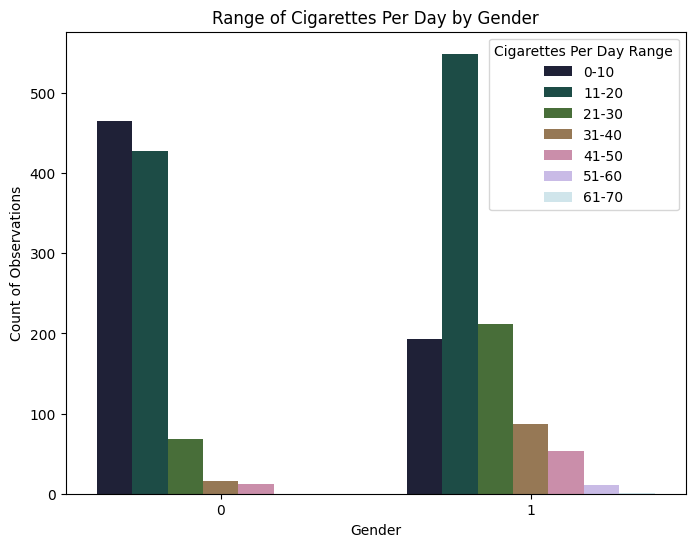

In [ ]:
# Creating a plot to answer Question 3

plt.figure(figsize=(8, 6))

# Using a countplot makes sense over here because we want to count/number of observations falling into the different categories
plot = sns.countplot(x='male', hue='Range_of_cigsperday', data=df_2, palette='cubehelix')

# Set the title of the legend
legend = plot.get_legend()
legend.set_title("Cigarettes Per Day Range")

# Edit the legend labels
new_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
for t, label in zip(legend.texts, new_labels):
    t.set_text(label)

# Labelling
plt.title("Range of Cigarettes Per Day by Gender")
plt.xlabel("Gender")
plt.ylabel('Count of Observations')

Answer 3 - The graph illustrates that over 500 females and approximately 450 males consume 10-20 cigarettes daily. Furthermore, it's noticeable that more than 450 males smoke fewer than between 0 to 10 cigarettes per day.

Question 4 - Since the majority of smokers fall within the 40-50 age range, it raises the question: What is the typical daily cigarette consumption range for this age group?


Text(0, 0.5, 'Count of Observations')

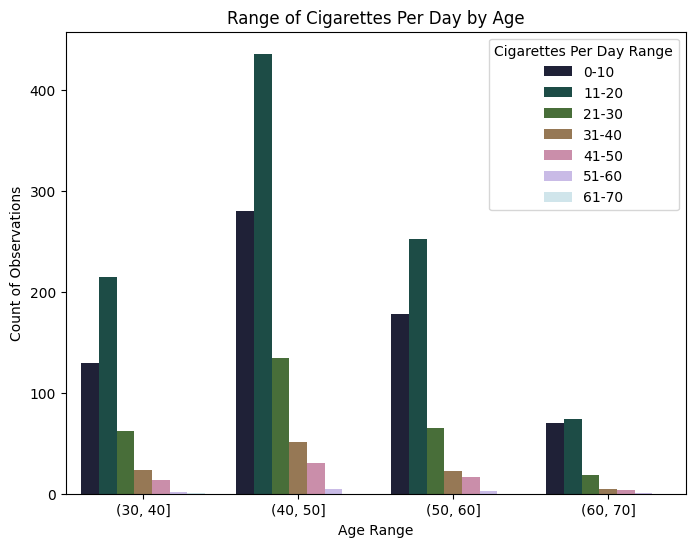

In [ ]:
# Creating a plot to answer Question 4

plt.figure(figsize=(8, 6))

# Using a countplot
plot = sns.countplot(x='age_range', hue='Range_of_cigsperday', data=df_2, palette='cubehelix')

# Set the title of the legend
legend = plot.get_legend()
legend.set_title("Cigarettes Per Day Range")

# Edit the legend labels
new_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
for t, label in zip(legend.texts, new_labels):
    t.set_text(label)

# Labelling
plt.title("Range of Cigarettes Per Day by Age")
plt.xlabel("Age Range")
plt.ylabel('Count of Observations')

Answer 4 - The graph suggests that the age groups typically consume between 11-20 cigarettes per day, with a secondary range of 0-10 cigarettes.

Question 5 - Given that the age groups 40-50 and 50-60 are the most active smokers, it's essential to investigate the patterns and trends in BMI, Heart Rate, Total Cholesterol, Diastolic Blood Pressure, Systolic Blood Pressure, and Glucose within these age ranges (40-60).

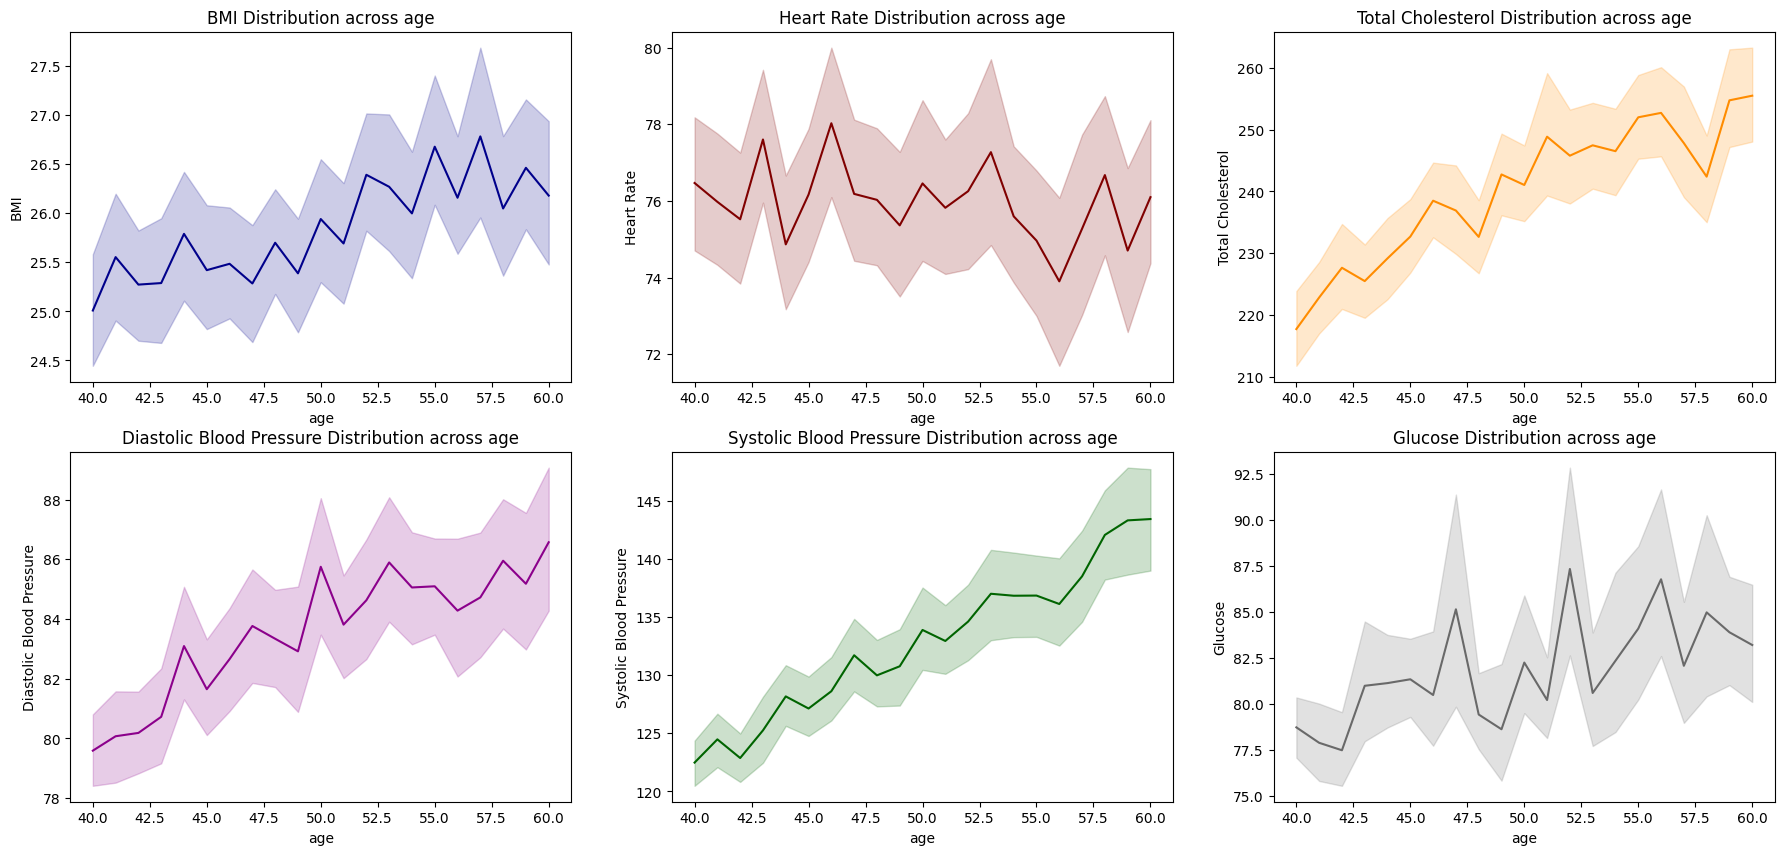

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(22, 10))

new_df = df[(df['age'] >= 40) & (df['age'] <= 60)]

# Plotting Glucose Distribution against age
ax1 = sns.lineplot(x='age', y='BMI', data=new_df, color='darkblue', ax=axes[0, 0])

# Plotting Heart Rate Distributions against age
ax2 = sns.lineplot(x='age', y='heartRate', data=new_df, color='maroon', ax=axes[0, 1])

# Plotting BMI Distribution against age
ax3 = sns.lineplot(x='age', y='totChol', data=new_df, color='darkorange', ax=axes[0, 2])

# Plotting Diastolic Blood Pressure against age
ax4 = sns.lineplot(x='age', y='diaBP', data=new_df, color='darkmagenta', ax=axes[1, 0])

# Plotting Systolic Blood Pressure against age
ax5 = sns.lineplot(x='age', y='sysBP', data=new_df, color='darkgreen', ax=axes[1, 1])

# Plotting Total Cholesterol against age
ax6 = sns.lineplot(x='age', y='glucose', data=new_df, color='dimgrey', ax=axes[1, 2])

axes[0, 0].set_ylabel('BMI')
axes[0, 1].set_ylabel('Heart Rate')
axes[0, 2].set_ylabel('Total Cholesterol')
axes[1, 0].set_ylabel('Diastolic Blood Pressure')
axes[1, 1].set_ylabel('Systolic Blood Pressure')
axes[1, 2].set_ylabel('Glucose')


axes[0, 0].set_title('BMI Distribution across age')
axes[0, 1].set_title('Heart Rate Distribution across age')
axes[0, 2].set_title('Total Cholesterol Distribution across age')
axes[1, 0].set_title('Diastolic Blood Pressure Distribution across age')
axes[1, 1].set_title('Systolic Blood Pressure Distribution across age')
axes[1, 2].set_title('Glucose Distribution across age')


plt.show()


Answer 5 - The data reveals several intriguing insights. Notably, Total Cholesterol, Diastolic Blood Pressure, and Systolic Blood Pressure exhibit pronounced upward trends with age, suggesting an association between increasing age and these health metrics. BMI also follows this pattern, albeit to a slightly lesser extent.

Conversely, Heart Rate and Glucose exhibit different behaviors. It's worth highlighting that Heart Rate experiences a significant drop around the age of 55. These observations shed light on the dynamic relationship between age and various health indicators.

Question 6 - What is the correlation between different variables?

<ipython-input-15-7e4cb74b17c4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


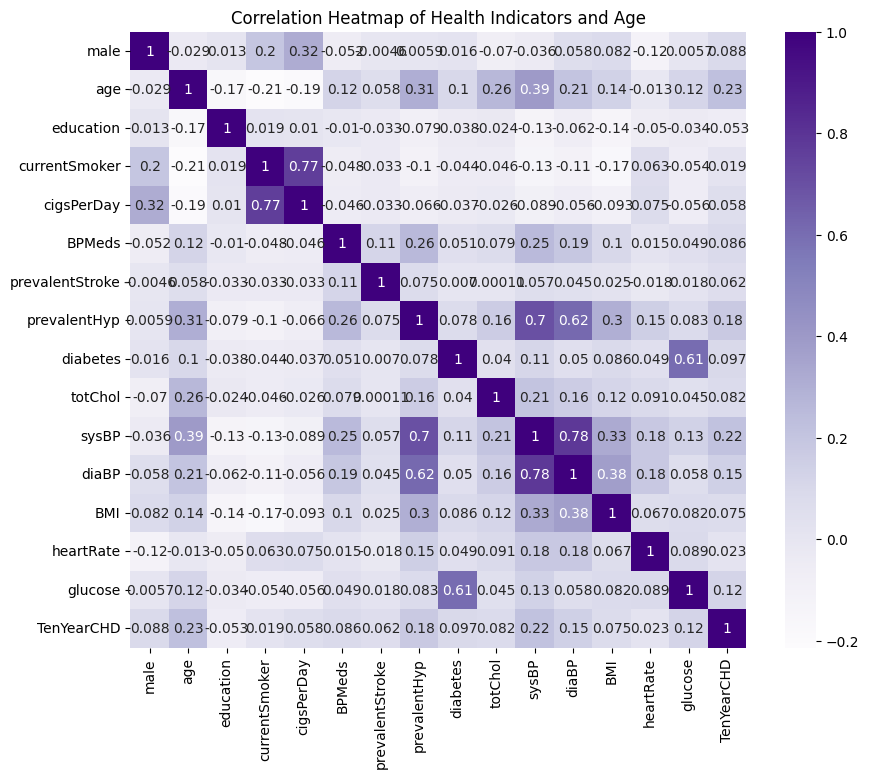

In [ ]:
# Compute the correlation matrix
df = df.drop(columns=['Sum_of_current_smoker'])
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Purples", square=True)
plt.title("Correlation Heatmap of Health Indicators and Age")
plt.show()

Answer 6 - The heatmap reveals significant correlations between Diastolic and Systolic Blood Pressure, as well as between Glucose and Diabetes. Let's delve deeper into these intriguing associations.

Question 7 - What is the correlation between Diabetes and Glucose?

In [ ]:
df_3 = df[df['diabetes'] == 0]
df_4 = df[df['diabetes'] == 1]

fig = figure(x_axis_label = 'Diabetes', y_axis_label = 'Glucose', title = 'Diabetes vs Glucose')
fig.circle(x='diabetes', y='glucose', source=df_3, color='blue', legend_label = 'No Diabetes')
fig.circle(x='diabetes', y='glucose', source=df_4, color='red', legend_label = 'Diabetes')
output_file(filename = 'diabetes vs glucose.html')
show(fig)

Output hidden; open in https://colab.research.google.com to view.

Answer 7 - A robust connection emerges between Glucose and Diabetes. Observations with elevated Glucose levels tend to exhibit higher diabetes readings, and vice versa.

Question 8 - What is the correlation between Systolic and Diastolic Diabetes?

In [ ]:
df_3 = df[df['male'] == 0]
df_4 = df[df['male'] == 1]

fig = figure(x_axis_label='Systolic BP', y_axis_label='Diastolic BP', tools='box_zoom,reset')

# Create a scatter plot with x-axis as 'Systolic BP' and y-axis as 'Diastolic BP'
Male_glyph = fig.circle(x='sysBP', y='diaBP', color='green', source=df_3)
Female_glyph = fig.circle(x='sysBP', y='diaBP', color='red', source=df_4)
Female_glyph.visible = False
menu = ['Male', 'Female']

callback = CustomJS(args=dict(scatter_1=Male_glyph, scatter_2=Female_glyph),
                    code="""scatter_1.visible = true
                    scatter_2.visible = true
                    if (this.value == 'Male') {scatter_2.visible = false}
                    else {scatter_1.visible = false}""")
menu = Select(options=["Male", "Female"], value="Male", title="Condition")
menu.js_on_change("value", callback)

output_file(filename="select_widget.html")
layout = column(menu, fig)
show(layout)

Output hidden; open in https://colab.research.google.com to view.


Answer 8 - A robust correlation between Diastolic Blood Pressure and Systolic Blood Pressure is evident in both genders.